In [1]:
import pandas as pd
from scipy import stats
import statsmodels
import numpy as np

import warnings

warnings.filterwarnings('ignore')

## Q 1

제공된 데이터(bcc.csv)는 암 환자와 정상인의 리지스틴 수치에 대한 자료이며,  
두 집단의 로그 리지스틴 값에 차이가 있는지를 검정하려고 한다.  
소문항별로 답을 구한 후, 구한 답을 제시된 [제출 형식]에 맞춰 답안 제출 페이지에 입력하시오.  
(단, 모델은 절편항을 포함한다.)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/refs/heads/master/krdatacertificate/s1.csv')
df.head()

,Resistin,Classification
0,7.99585,1
1,4.06405,1
2,9.27715,1
3,12.76600,1
4,10.57635,1


### Q 1-1

두 집단의 로그 리지스틴 값의 분산에 차이가 있는지를 알아보기 위해  
F-검정을 수행할 때 검정통계량의 값을 구하여라.  
(단, 분자의 자유도가 분모의 자유도보다 크도록 하여라. 반올림하여 소수 셋째 자리까지 작성)

In [3]:
df_1 = df[df.Classification == 1].Resistin
df_2 = df[df.Classification == 2].Resistin

In [4]:
len(df_1), len(df_2)

(52, 64)

In [5]:
log1 = np.log(df_1)
log2 = np.log(df_2)

In [6]:
s1 = np.var(log1, ddof=1) # 표본분산 ddof = 1
s2 = np.var(log2, ddof=1)

In [7]:
s1, s2

(np.float64(0.3765806078045612), np.float64(0.5076144576565117))

In [8]:
f_stats = s2 / s1
f_stats

np.float64(1.3479569769029498)

In [9]:
f_stats.round(3)

np.float64(1.348)

### Q 1-2

두 집단의 로그 리지스틴 값에 대한 합동 분산 추정량을 구하여라.  
반올림하여 소수 셋째 자리까지 작성

In [10]:
sp2 = ((len(df_1) - 1) * s1 + (len(df_2) - 1) * s2) / (len(df_1) + len(df_2) - 2)
sp2.round(3)

np.float64(0.449)

### Q 1-3

2번 문제에서 구한 합동 분산 추정량을 이용하여  
두 집단의 로그 리지스틴 값에 유의미한 차이가 있는지  
독립표본 t-검정을 수행하고 p-값을 구하여라. (반올림하여 소수 셋째 자리까지 작성)  

합동 분산 T 검정

SE = (S^2 * (1/n1 + 1/n2)) ** (1/2)

In [11]:
m1 = log1.mean()
m2 = log2.mean()

n1 = len(df_1)
n2 = len(df_2)

std_error = np.sqrt(sp2 * ( 1 / n1 + 1 / n2))
t_stats = (m1 - m2) / std_error

pvalue = 2 * (1 - stats.t.cdf(abs(t_stats), df = n1 + n2 - 2))
print(pvalue.round(3))

0.003


In [12]:
stats.ttest_ind(log1, log2).pvalue.round(3)

np.float64(0.003)

## Q 2

금속 성분 함유량 데이터(변수 1개) -   
제품에 금속 재질 함유량의 분산이 1.3을 넘으면 불량이라고 보고 있는데  
제조사별로 차이가 난다고 제보를 받았다. 분산에 대해 검정을 수행하시오.  
(유의확률 0.05)

- 1 연구가설과 귀무가설 작성
- 2 양측 검정 시행
- 3 검정통계량, 가설채택

### Q 2-1

- 귀무가설 H0 : 제품의 금속 재질 함유량의 분산은 1.3이다.
- 대립가설 H1 : 제품의 금속 재질 함유량의 분산은 1.3이 아니다.

### Q 2-2

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/content.csv')
df.head()

,content
0,97.995295
1,101.478315
2,102.284913
3,98.993634
4,104.635232


In [14]:
len(df)

200

데이터가 5000개 미만이므로 shapiro-wilk 검정을 통해 정규성 검정을 진행한다.

#### 정규성 검정
- 귀무가설 H0 : 정규성을 만족한다.
- 대립가설 H1 : 정규성을 불만족한다.

In [15]:
result = stats.shapiro(df.content)

if result.pvalue >= 0.05:
    print(f"P-Value가 {result.pvalue:.4f}이므로 귀무가설을 채택, 정규성을 만족한다.")

P-Value가 0.4606이므로 귀무가설을 채택, 정규성을 만족한다.


데이터가 정규성을 만족하므로 단일 표본 분산 검정을 진행한다.

#### 단일 표본 분산 검정
- 귀무가설 H0 : 제품의 금속 재질 함유량의 분산은 1.3이다.
- 대립가설 H1 : 제품의 금속 재질 함유량의 분산은 1.3이 아니다.

In [16]:
def chi_var_test(data, var0, alternative='two-sided'):
    length = len(data)
    # 카이 통계량
    chi_stat = (length - 1) * np.var(data, ddof=1) / var0

    
    temp = stats.chi2.cdf(chi_stat, length - 1)

    # 양측검정
    if alternative == 'two-sided':
        pval = 2 * (1 - temp) if temp > 0.5 else 2 * temp
    elif alternative == 'greater':
        pval = 1 - temp
    elif alternative == 'less':
        pval = temp
    else:
        return None
    return chi_stat, pval

In [17]:
chi_var_test(df.content, var0 = 1.3)[1].round(4)

np.float64(0.0)

P-Value가 0.05 미만이므로, 유의수준 5% 하에서 귀무가설을 기각하고 대립가설을 채택,  
제품의 금속 재질 함유량의 분산은 1.3이 아니다.

### Q 2-3

In [18]:
chi_var_test(df.content, var0 = 1.3)[0].round(3)

np.float64(328.292)

검정통계량은 약 328.292이며, 연구가설을 채택한다.

## Q 3

Lot별 200개에 대한 불량 제품 수량 데이터(변수 2개 - lot번호, 불량제품수)

- 1 불량률 관리도에 따라 관리중심선(CL : Center Line),   
  관리 상한선(UCL : Upper Control Limit),   
  하한선(LCL : Lower Control Limit) 구하기
- 2 관리도 시각화

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/22/error.csv')
df.head()

,iot_number,error_case_number
0,1,4.5
1,2,2.5
2,3,2.0
3,4,3.0
4,5,0.5


## Q 4

공장에서는 진공관 수명이 1만 시간이라고 주장하여 품질관리팀에서  
12개 샘플을 뽑았음 유의수준 5%에서 부호 검정하시오

- 귀무가설 연구가설 세우기
- 유효한 데이터의 숫자는?
- 검정통계량 및 연구 가설 채택 여부를 작성하라

### Q 4-1

- 귀무가설 H0 : 진공관 수명은 1만 시간이다.
- 연구가설 H1 : 진공관 수명은 1만 시간이 아니다.

### Q 4-2

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/23/problem2.csv')
df.head()

,name,life span
0,sample1,10000
1,sample2,9000
2,sample3,9500
3,sample4,10000
4,sample5,10000


In [21]:
len(df[df['life span'] != 10000])

8

중위수와 동일한 값은 부호 검정에서 불필요하므로 유효한 데이터는 8개이다.

### Q 4-3

wilcoxon의 부호순위 검정을 진행한다.  
비모수 검정이므로 정규성 검정은 생략한다.

In [22]:
result = stats.wilcoxon(df['life span'] - 10000)

In [23]:
print(f'검정 통계량은 {result.statistic}이다.')
print(f'P-Value가 {result.pvalue:.4f}이므로 유의수준 5% 하에서 귀무가설을 채택한다.')

검정 통계량은 8.5이다.
P-Value가 0.2109이므로 유의수준 5% 하에서 귀무가설을 채택한다.


## Q 5

아래 이미지와 같은 학과별 학점 분포 인원수 표가 있다. 학과와 성적이 관계있는지를 검정하라

- 1. 귀무가설 연구가설 세우기
- 2. 학과와 성적이 독립일 경우의 기댓값을 구하시오
- 3. 검정통계량 및 연구 가설 채택 여부를 작성하라

In [24]:
idx = ['1.5-2.5', '2.5-3.5', '3.5-4.5']
values = {
    '사회과학':[15, 60, 24],
    '자연과학':[25, 69, 5],
    '공학':[10, 77, 13]
}

df = pd.DataFrame(data=values, index=idx)
df

,사회과학,자연과학,공학
1.5-2.5,15,25,10
2.5-3.5,60,69,77
3.5-4.5,24,5,13


### Q 5-1

- 귀무가설 H0 : 학과에 따른 성적은 관련이 없다.
- 연구가설 H1 : 학과에 따른 성적은 관련 있다.

### Q 5-2

가정에 따라 독립일 경우 각각의 기댓값을  
chi2_contingency 모듈을 통해 확인하면 아래와 같다.

In [25]:
stats.chi2_contingency(df).expected_freq

array([[16.61073826, 16.61073826, 16.77852349],
       [68.43624161, 68.43624161, 69.12751678],
       [13.95302013, 13.95302013, 14.09395973]])

### Q 5-3

In [26]:
print(f"검정통계량은 {stats.chi2_contingency(df).statistic:.4f} 이다.\n")
print(f"P-Value가 {stats.chi2_contingency(df).pvalue:.4f} 이므로 유의수준 5% 하에서 귀무가설을 기각하고 대립가설을 채택,\n학과에 따른 성적은 연관이 있다. (독립이 아니다.)")

검정통계량은 22.1369 이다.

P-Value가 0.0002 이므로 유의수준 5% 하에서 귀무가설을 기각하고 대립가설을 채택,
학과에 따른 성적은 연관이 있다. (독립이 아니다.)


## Q 6

광고횟수와 광고비에 따른 매출액의 데이터이다

- 1. 광고비 변수를 가변수 처리후 다중회귀를 수행하여 회귀계수가 유의한지 검정
- 2. 회귀식이 유의한지 판단

In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/24/problem2.csv',encoding='cp949')
df.head()

,광고횟수,광고비,매출액
0,2,낮음,15
1,3,낮음,16
2,4,낮음,17
3,4,높음,18
4,5,높음,20


### Q 6-1

In [28]:
df.광고비.unique()

array(['낮음', '높음'], dtype=object)

광고비 변수의 낮음을 0, 높음을 1로 하여 가변수 처리를 한다.

In [29]:
df['광고비'] = df['광고비'].map(lambda x: 0 if x == '낮음' else 1)
df['광고비'].unique()

array([0, 1])

In [30]:
import statsmodels.api as sm

In [31]:
x = sm.add_constant(df[['광고횟수', '광고비']])
y = df[['매출액']]

model = sm.OLS(y, x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    매출액   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     221.2
Date:                Thu, 09 Oct 2025   Prob (F-statistic):           9.96e-08
Time:                        21:29:49   Log-Likelihood:                -11.883
No. Observations:                  11   AIC:                             29.77
Df Residuals:                       8   BIC:                             30.96
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.1641      0.556     21.876      0.000      10.882      13.446
광고횟수           1.4350      0.074     19.518      0.000       1.265       1.605
광고비            0.5227      0.536      0.975      0.358      -0.713       1.759
==============================================================================
Omnibus:                        7.665   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                3.407
Skew:                           1.265   Prob(JB):                        0.182
Kurtosis:                       4.015   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
model.pvalues

const    2.011914e-08
광고횟수     4.935243e-08
광고비      3.579629e-01
dtype: float64

광고횟수 변수는 P-Value가 0.05 미만이므로 유의수준 5% 하에서  
회귀계수가 통계적으로 유의하다.  

광고비 변수는 P-Value가 0.05 이상이므로 유의수준 5% 하에서  
회귀계수가 통계적으로 유의하지 않다.

### Q 6-2

회귀식의 F-Statistic의 P-Value가 9.96e-08이므로 유의수준 5% 하에서  
회귀식은 통계적으로 유의하다. 

## Q 7

각 공장별로 12개의 제품을 추출하여 구한 정보가 A생산라인의 제품 평균은 5.7mm이고 표준편차는 0.03,  
B생산라인의 제품 평균은 5.6mm이고 표준편차는 0.04라면  
5%유의수준으로 두 제품의 평균이 차이가 있는지 여부를 검정하기 Z(0.05) = 1.65

- 1. 귀무가설과 대립가설을 세워라
- 2. 두 평균이 차이가 있는지 검정하라

### Q 7-1

- 귀무가설 H0 : 두 제품의 평균은 같다.
- 연구가설 H1 : 두 제품의 평균은 다르다.

### Q 7-2

- T 통계량 = (두 집단 평균의 차이) / (표본 평균들 차이에 대한 표준오차)
- 표준오차 = 표준편차 / (표본 수) ** (1/2)

In [33]:
m1 = 5.7
m2 = 5.6

s1 = 0.03
s2 = 0.04

# se1 = 0.03 / np.sqrt(12)
# se2 = 0.04 / np.sqrt(12)

se = np.sqrt( ((s1 ** 2 / 12)  + (s2 ** 2 / 12)) )

t_stat = (m1 - m2) / se

pvalue = stats.norm.sf(t_stat)
pvalue

np.float64(2.1310957989212665e-12)

In [34]:
pvalue > 0.05

np.False_

P-Value가 0.05 이하이므로 유의수준 5% 하에서 두 제품의 평균은 통계적으로 다르다.

## Q 8
바이러스 감염 분류표를 보고 베이지안 분류 방법을 사용해  
양성으로 예측된 사람이 실제로 양성일 확률을 구하라

In [35]:
data = pd.DataFrame({'양성(실제)':[370,10],'음성(실제)':[10,690]},index = ['양성(예측)','음성(예측)'])
data

,양성(실제),음성(실제)
양성(예측),370,10
음성(예측),10,690


In [36]:
data.sum().sum()

np.int64(1080)

In [37]:
# from sklearn.mixture import BayesianGaussianMixture

In [38]:
# bgm = BayesianGaussianMixture()

- P(실제 양성|예측 양성) = P(예측 양성|실제 양성) * P(실제 양성) / P(예측 양성)
- P(실제 양성) = (370 + 10) / 1080
- P(예측 양성) = (370 + 10) / 1080
- P(예측 양성|실제 양성) = P(예측 양성 ∩ 실제 양성) / P(실제 양성) = 370 / (370 + 10)
- P(예측 양성|실제 양성) * P(실제 양성) / P(예측 양성) = (370 / 380 * 380 / 1080) / (380 / 1080)  
  = 370 / 380

In [39]:
round(370 / 380, 4)

0.9737

양성으로 예측된 사람이 실제로 양성일 확률은 약 97.37% 이다.

## Q 9

주어진 데이터에서 신뢰구간을 구하려한다.  
정규분포에서 표폰을 추출함  
[Z(0.05) = -1.65 , Z(0.025) = -1.96, T(0.05, 8) = 1.860 , T0.025(0.025, 8) = 2.306]  
데이터(9개) : [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3 4.4, 4.7]

- 1. 모분산을 모르는 경우 주어진 데이터의 95% 신뢰구간을 구하라
- 2. sigma = 0.04인걸 알고 있을때의 95% 신뢰구간을 구하라

### Q 9-1

모분산을 모르기 때문에 T 분포를 활용하여 신뢰구간을 계산한다.

In [40]:
data = [3.1, 3.3, 3.5, 3.7, 3.9, 4.1, 4.3, 4.4, 4.7]

sample_std = np.std(data, ddof=1)
n = len(data)
se = sample_std / np.sqrt(n)
sample_m = np.mean(data)

In [41]:
lower, upper = stats.t.interval(0.95, n - 1, loc=sample_m, scale=se)
(lower.round(3), upper.round(3))

(np.float64(3.478), np.float64(4.3))

In [42]:
t_crit = stats.t.ppf(1 - ((1 - 0.95) / 2), n - 1)
t_crit

np.float64(2.306004135204166)

In [43]:
upper = sample_m + t_crit * se
lower = sample_m - t_crit * se

(lower.round(3), upper.round(3))

(np.float64(3.478), np.float64(4.3))

### Q 9-2

모분산을 알기 때문에 Z 분포를 활용하여 신뢰구간을 계산한다.

In [44]:
s = 0.04

se = np.sqrt(s) / np.sqrt(n)

z_score = stats.norm.ppf(0.975).round(3)

upper = sample_m + z_score * se
lower = sample_m - z_score * se

(lower.round(3), upper.round(3))

(np.float64(3.758), np.float64(4.02))

In [45]:
stats.norm.interval(0.95, loc = sample_m, scale = se)

(np.float64(3.758224623252885), np.float64(4.019553154524893))

- 유의확률로부터 통계량 계산 : ppf
- 통계량으로 유의확률 계산 : cdf
- norm.sf == 1 - norm.cdf

## Q 10
서울에서 영동까지 100km/h로 가고 영동에서 서울까지 80km/로 돌아왔을 때, 평균 속도는?

In [46]:
t1 = 1 / 100
t2 = 1 / 80
d = 2

In [47]:
avg = d / (t1 + t2) # 조화 평균

In [48]:
round(avg, 3)

88.889

평균 속도는 약 88.889 km/h 이다.

## Q 11

연매출이 3000, 4000, 5000이었다면 연평균 몇배가 증가한 것인가?

In [49]:
round((5000 / 3000) ** (1/2), 3)

1.291

연 평균 약 1.29배 (29%) 증가했다.

## Q 12

남성, 여성의 등산, 수영에 대한 취미 선호도 빈도표(2x2)를 보고,  
남성 중에서 등산을 좋아할 확률을 구하시오

In [50]:
data = pd.DataFrame({'등산': [20, 15], '수영':[10, 30]}, index=['남자', '여자'])
data

,등산,수영
남자,20,10
여자,15,30


In [51]:
data.sum().sum()

np.int64(75)

- P(등산 | 남자) = P(등산 ∩ 남자) / P(남자) = (20 / 75) / (30 / 75) = 20 / 30

In [52]:
round(20 / 30, 3)

0.667

남성 중에서 등산을 좋아할 확률은 약 66.7% 이다.

## Q 13

표본 10개의 분산이 90일 때 신뢰도 95%로 모분산의 신뢰구간을 추정

모분산의 신뢰구간을 추정하기 위해 카이제곱 분포를 활용하여 추정한다.

In [53]:
n = 10
s2 = 90

df = n - 1
alpha = 0.05

lower = (df * s2) / stats.chi2.ppf(1 - (alpha / 2), df)
upper = (df * s2) / stats.chi2.ppf(alpha / 2, df)

(lower.round(3), upper.round(3))

(np.float64(42.581), np.float64(299.957))

## Q 14

임상 대상 20명에 대해 혈압약 투약 이전과 이후의 차이가 24, 표준편차 9  
신뢰구간 95%, 차이가 존재하는지 확인하려한다

- 1. 귀무가설과 연구가설을 제시하시오
- 2. 검정 후 귀무가설 기각 여부 제시

### Q 14-1

- 귀무가설 H0 : 혈압약 투약 이전과 이후의 차이는 없다.
- 대립가설 H1 : 혈압약 투약 이전과 이후의 차이는 있다.

### Q 14-2

In [54]:
after = 24
std = 9
n = 20

t_stat = 24 / (9 / np.sqrt(20))

# 양측 검정
pvalue = (1 - stats.t.cdf(t_stat, df = n - 1)) * 2

print(f"검정통계량 : {t_stat:.4f}\nP-Value : {pvalue}")

검정통계량 : 11.9257
P-Value : 2.8772539906185557e-10


P-Value가 0.05 미만이므로 귀무가설을 기각하고 연구가설을 채택,  
통계적으로 혈압약 투약 이전과 이후의 차이가 있다.

### P-Value 계산식

- 우측 단측검정 : 모집단의 평균이 특정 값보다 크다일 경우  
  pvalue = 1 - stats.t.cdf(t_stat, df)
- 좌측 단측검정 : 모집단의 평균이 특정 값보다 작다일 경우  
  pvalue = stats.t.cdf(t_stat, df)
- 양측검정 : 모집단의 평균이 특정 값과 다를 경우  
  pvalue = 2 * (1 - stats.t.cdf(abs(t_stat), df))

## Q 15

공장 X,Y,Z의 평균 출하 소요시간을 여러 일자에 거쳐 측정한 데이터이다.  
각 공장의 중위수의 차이가 존재하는지 확인하려 한다

- 1. 귀무가설과 연구가설을 제시하시오
- 2. 검정 후 귀무가설 기각 여부 제시

In [55]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/25/problem5.csv',encoding='cp949')
df.head()

,출하 소요시간,공장명,공장별 출하 소요시간 순위
0,71,Z,11
1,75,X,14
2,71,X,12
3,53,Z,1
4,50,X,1


### Q 15-1

- 귀무가설 : 각 공장의 평균 출하 소요시간의 중위수는 차이가 없다.
- 연구가설 : 각 공장의 평균 출하 소요시간의 중위수는 차이가 있다.

## Q 15-2

각 공장의 중위수 차이를 검정해야 하므로 비모수 검정인  
kruskal-wallis 검정을 진행한다.

In [56]:
fac_x = df[df.공장명 == 'X']['출하 소요시간']
fac_y = df[df.공장명 == 'Y']['출하 소요시간']
fac_z = df[df.공장명 == 'Z']['출하 소요시간']

In [57]:
len(fac_x), len(fac_y), len(fac_z)

(15, 15, 14)

In [58]:
stats.kruskal(fac_x, fac_y, fac_z)

KruskalResult(statistic=np.float64(0.7217886080379153), pvalue=np.float64(0.6970526702392181))

P-Value가 약 0.697이므로 유의수준 5% 하에서 귀무가설을 채택,  
통계적으로 각 공장의 평균 출하 소요시간의 중위수는 차이가 없다.

## Q 16
1개년 50억원, 2개년 60억원, 3개년 70억원의 예산을 가지고  
NPV(순현재가치)가 가장 높아지는 안을 제시하시오

In [59]:
data = {
    "1개년": [10, 15, 12, 13, 16],
    "2개년": [20, 14, 11, 25, 30],
    "3개년": [15, 19, 30, 20, 24],
}

df = pd.DataFrame(data, index=["1안", "2안", "3안", "4안", "5안"])
df

,1개년,2개년,3개년
1안,10,20,15
2안,15,14,19
3안,12,11,30
4안,13,25,20
5안,16,30,24


## Q 17

철강제품의 불량률을 조사하고자 한다. 이 때, 불량률의 90%,  
추정오차한계가 5% 이내가 되기 위하여 적절한 표본의 크기 중 최소값은 얼마인가?

In [90]:
# 주어진 값
confidence = 0.90   # 신뢰수준
p = 0.9             # 불량률
e = 0.05            # 허용오차 (추정오차 한계)

# Z값 계산 (양측 신뢰구간이므로 alpha/2 사용)
alpha = 1 - confidence
z = stats.norm.ppf(1 - alpha/2)

# 표본 크기 계산 공식
n = (z**2 * p * (1 - p)) / (e**2)

print(f"Z-Score: {z:.3f}")
print(f"필요한 최소 표본 크기: {int(n) + 1}명")


Z-Score: 1.645
필요한 최소 표본 크기: 98명


## Q 18

아래는 1월부터 9월까지의 은의 가격이다

- 1. 은의 가격 및 이동평균값 3이 설정된 시계열 그래프를 그려라
- 2. 1월 대비 9월의 은의 가격은 몇 % 올랐는가? 소수점 두번째 자리에서 반올림

In [60]:
data = {
    'month': ['1월', '2월', '3월', '4월', '5월', '6월', '7월', '8월', '9월'],
    'USD/oz': [12.14, 42.6, 34.4, 35.29, 30.96, 57.12, 37.84, 42.49, 31.38]
}

df = pd.DataFrame(data)
df.T

,0,1,2,3,4,5,6,7,8
month,1월,2월,3월,4월,5월,6월,7월,8월,9월
USD/oz,12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38


### Q 18-1

In [61]:
df['month'] = pd.to_datetime(df.month, format='%m월')
df['month'] = df['month'].dt.month
df = df.set_index('month')

In [62]:
df['ma_3'] = df.rolling(3).mean()
df

,USD/oz,ma_3
month,,
1,12.14,NaN
2,42.60,NaN
3,34.40,29.713333
4,35.29,37.430000
5,30.96,33.550000
6,57.12,41.123333
7,37.84,41.973333
8,42.49,45.816667
9,31.38,37.236667


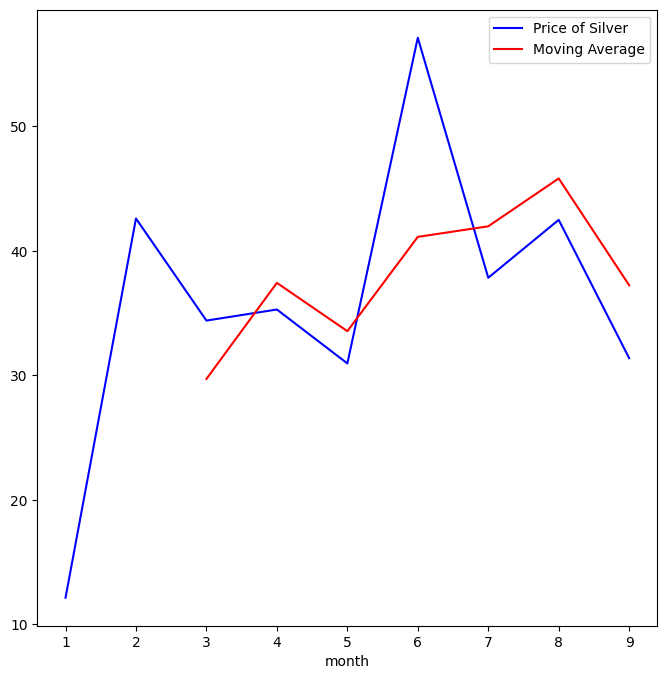

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))

df['USD/oz'].plot(kind='line', color='blue', label = 'Price of Silver')
df['ma_3'].plot(kind='line', color='red', label = 'Moving Average')

plt.legend()
plt.show();

### Q 18-2

In [64]:
((df.loc[9, 'USD/oz'] / df.loc[1, 'USD/oz'] - 1) * 100).round(2)

np.float64(158.48)

1월 대비 9월의 은의 가격은 약 158.48% 상승했다.

## Q 19

아래 그래프는 A,B,C 자치구별 W 의원에 대한 찬성, 반대 지지를 나타낸다.  
자치구별 지지율이 같은지에 대해서 검정하라

- 1. 연구가설과 귀무가설을 설정하라
- 2. 검정통계량 구하고 결론을 내라

In [65]:
data = {
    'A': [176, 124],
    'B': [193, 107],
    'C': [159, 141]
}

df = pd.DataFrame(data, index=['찬성', '반대'])
df

,A,B,C
찬성,176,193,159
반대,124,107,141


### Q 19-1

- 귀무가설 H0 : 자치구별 지지율은 같다.
- 연구가설 H1 : 자치구별 지지율은 다르다.

### Q 19-2

자차구에 따른 지지율을 검정해야 하므로 독립성 검정을 진행한다.

In [66]:
result = stats.chi2_contingency(df)

print(f'검정통계량 : {result.statistic:.4f}')
print(f'P-Value : {result.pvalue:.4f}')

result.pvalue >= 0.05

검정통계량 : 7.9454
P-Value : 0.0188


np.False_

P-Value가 0.05 미만이므로 유의수준 5% 하에서 귀무가설을 기각하고 대립가설을 채택,  
통계적으로 자치구에 따른 지지율은 다르다.

## Q 20

A초등학교 남학생 16명과 여학생 9명의 혈압을 측정한 pressure.csv 를 통해  
남녀학생의 평균 혈압에 차이가 없는지 분석하라.  
(단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정)

- 1. 연구가설과 귀무가설을 설정하라
- 2. 통계량을 구하고, 연구가설 채택여부를 기술하라.
- 3. 2 에서 구한 검정 통계량 값을 바탕으로 신뢰구간을 구하라

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/pressure.csv')
df.head()

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0


### Q 20-1

- 귀무가설 H0 : 남녀학생의 평균 혈압은 차이가 없다.
- 연구가설 H1 : 남녀학생의 평균 혈압은 차이가 있다.

### Q 20-2

남녀학생별 혈압은 정규분포를 따르고, 등분산이므로  
독립 표본 T-검정을 진행한다.

In [68]:
male_df = df[df.gender == 'male'].pressure
female_df = df[df.gender == 'female'].pressure

len(df) == len(male_df) + len(female_df)

True

In [69]:
result = stats.ttest_ind(male_df, female_df, alternative='two-sided')
result

TtestResult(statistic=np.float64(1.598335024574904), pvalue=np.float64(0.12361716364314851), df=np.float64(23.0))

In [70]:
print(f"검정통계량 : {result.statistic:.4f}")
print(f"P-Value : {result.pvalue:.4f}")

if result.pvalue >= 0.05:
    print('귀무가설 채택')

검정통계량 : 1.5983
P-Value : 0.1236
귀무가설 채택


P-Value가 0.05 이상이므로 유의수준 5% 하에서 귀무가설을 채택,  
통계적으로 남녀학생의 평균 혈압은 차이가 없다.

### Q 20-3


In [71]:
n1 = len(male_df)
n2 = len(female_df)

var1 = np.var(male_df, ddof=1)
var2 = np.var(female_df, ddof=1)

df1 = n1 - 1
df2 = n2 - 1

m1 = np.mean(male_df)
m2 = np.mean(female_df)

sp2 = (df1 * var1 + df2 * var2) / (df1 + df2)

se = np.sqrt(sp2 * (1 / n1 + 1 / n2))

t_crit = stats.t.ppf(1 - ((1 - 0.95) / 2), df1 + df2)

lower = (m1 - m2) - t_crit * se
upper = (m1 - m2) + t_crit * se

In [72]:
lower.round(3), upper.round(3)

(np.float64(-1.856), np.float64(14.471))

In [73]:
lower, upper = stats.t.interval(0.95, df1 + df2, loc=m1 - m2, scale=se)
lower.round(3), upper.round(3)

(np.float64(-1.856), np.float64(14.471))

## Q 21

height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv로 다음을 분석하라  
A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다.  
이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보고자 한다.

- 1. 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두자리)를 구하시오.
  - 베이지안 회귀
  - 시드넘버 1234로 지정
  - 1000번의 burn-in 이후 10,000의 MCMC를 수행
  - 회귀계수의 사전분포는 부적절한 균일분포(inproper uniform prior distribution),  
    오차항의 분산의 사전분포는 역감마 분포로 지정.  
    이때, 형상(Shape)모수와 척도(Scale)모수는 각각 0.005로 지정.
- 2. 위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하라

In [104]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/26/problem7.csv')
df.head()

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499


In [106]:
import pymc as pm

height = df["height"]
waist = df["waistline"]
weight = df["weight"]

# 베이지안 회귀모형 설정
with pm.Model() as model:
    # 사전분포 (부적절한 균일분포는 넓은 Normal로 근사 가능)
    beta_0 = pm.Flat("beta_0")
    beta_h = pm.Flat("beta_h")
    beta_w = pm.Flat("beta_w")
    
    # 오차항 분산의 사전분포 (Inverse-Gamma)
    sigma2 = pm.InverseGamma("sigma2", alpha=0.005, beta=0.005)
    sigma = pm.Deterministic("sigma", sigma2**0.5)
    
    # 선형모형
    mu = beta_0 + beta_h * height + beta_w * waist
    
    # 관측값
    y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=weight)
    
    # 샘플링
    trace = pm.sample(10000, tune=1000, random_seed=1234)

# 회귀계수 요약
print(pm.summary(trace, var_names=["beta_0", "beta_h", "beta_w"]))

# 예측
pred_weight = trace.posterior["beta_0"].mean() + \
               trace.posterior["beta_h"].mean() * 180 + \
               trace.posterior["beta_w"].mean() * 85

print(f"예측된 몸무게: {pred_weight.values:.2f} kg")

## Q 22

2년 전 제품 생산량이 100,000개, 1년 전 제품 생산량이 150,000개,  
그 후 팩토리 기술의 상승으로 제품 생산량이 250,000개 되었을 때,  
연평균 상승률의 대푯값을 구하시오.  
(반올림하여 소수점 아래 둘째 자리까지 표기)

In [75]:
round(((25 / 10) ** (1/2) - 1) * 100, 2) 

58.11

연평균 상승률의 대표값은 58.11% 이다.

## Q 23

12건의 광고 시간 측정. 평균 15.5초, 분산 3.2초 일때 90% 신뢰구간은?

In [76]:
alpha = 0.1

mu = 15.5
var = 3.2
n = 12

se = (var / n) ** (1/2)

t_crit = stats.t.ppf(1 - alpha / 2, n - 1)

lower = mu - t_crit * se
upper = mu + t_crit * se

(lower, upper)

(np.float64(14.572609067393861), np.float64(16.427390932606137))

- t.interval : 신뢰구간 계산
  - 신뢰구간 (90% 또는 95% 등)
  - 자유도 (n - 1)
  - loc = 평균
  - scale = 표준오차 (표준편차 / np.sqrt(표본수))

In [77]:
stats.t.interval(0.90, n-1, loc=mu, scale=np.sqrt(var) / np.sqrt(n))

(np.float64(14.572609067393861), np.float64(16.427390932606137))

## Q 24

강의 상류와 하류의 생물 다양성 점수에 차이가 있는지 검정하시오.  
(단, 같은 강에서 상류와 하류는 서로 독립적이지 않으며, 종속적인 관계에 있다.)

- 1. 귀무가설과 대립가설을 세우시오
- 2. 검정 통계량과 유의 확률을 구하고, 연구가설 채택여부를 검정하시오.

In [91]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/river.csv')
df.head()

,River,up,down
0,A,57.1,45.7
1,B,51.6,37.2
2,C,53.9,53.3
3,D,59.0,54.3
4,E,57.5,46.3


### Q 24-1

- 귀무가설 H0 : 생물 다양성 점수에 차이가 없다.
- 대립가설 H1 : 생물 다양성 점수에 차이가 있다.

### Q 24-2

In [94]:
df.River.unique(), df.River.nunique()

(array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
        'N', 'O', 'P', 'Q', 'R', 'S'], dtype=object),
 19)

In [93]:
len(df)

19

같은 강에서 상류와 하류는 서로 독립적이지 않기 때문에  
정규성 만족한다면 대응 표본 T-검정을 진행한다.

데이터가 5000개 미만이므로 shapiro-wilk 검정을 진행한다.

### 정규성 검정
- 귀무가설 : 정규성을 만족한다.
- 대립가설 : 정규성을 불만족한다.

In [95]:
up = df.up
down = df.down

In [96]:
pval_a = stats.shapiro(up)
pval_b = stats.shapiro(down)

(pval_a.pvalue, pval_b.pvalue)

(np.float64(0.6447678118884479), np.float64(0.9640817488568015))

정규성을 만족하므로 대응 표본 T-검정을 진행한다.

In [100]:
stats.ttest_rel(up, down)

TtestResult(statistic=np.float64(1.2922226959983891), pvalue=np.float64(0.21262429174344777), df=np.int64(18))

P-Value가 0.05 이상이므로 귀무가설을 채택, 유의수준 5% 하에서  
통계적으로 상류와 하류의 생물 다양성 점수에 차이가 없다.

## Q 25

user_counts를 종속변수로 하는 데이터이다

- 1. 분위수 회귀분석 (Quantile Regression) 을 사용하여 회귀 계수를 구하시오.  
  (반올림하여 소수점 아래 둘째자리까지 표기하시오.)
- 2. 1의 모델의 회귀계수를 활용하여 temperature : 10.5, wind : 8.2,  
  precipitation : 3.5 일때 user_counts를 예측하시오

In [111]:
df = pd.read_csv('https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/27/problem8.csv')
df.head()

,temperature,wind,precipitation,user_counts
0,10.400000,4.600,0.844944,6368
1,5.666667,4.625,0.040860,5902
2,4.933333,4.725,0.008696,6226
3,3.400000,2.675,0.156989,5829
4,8.900000,3.950,7.988462,7589


### Q 25-1

In [127]:
from sklearn.linear_model import QuantileRegressor

qr = QuantileRegressor()
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]

qr.fit(x, y)

x1, x2, x3 = qr.coef_
bias = qr.intercept_

print(f"X1 : {x1.round(2)}, X2 : {x2.round(2)}, X3 : {x3.round(2)}")

X1 : 213.49, X2 : 0.0, X3 : 0.0


### Q 25-2

In [131]:
user_counts = 10.5 * x1 + 8.2 * x2 + 3.5 * x3 + bias
user_counts.round(2)

np.float64(8278.75)